In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter 
PARENT_DIR = '/home/groups/dpwall/briannac/SARS-CoV-2_structural_variations/'
sv_table_file = PARENT_DIR + 'results/alignment/gisaid_seqs.svs_table.tsv'
sv_table_all_out = PARENT_DIR + 'results/alignment/gisaid_seqs.svs_table_all.tsv'
sv_table_small_out = PARENT_DIR + 'results/alignment/gisaid_seqs.svs_table_small.tsv'

In [2]:
sv_table = pd.read_csv(sv_table_file, sep='\t')
sv_table.head()

,Start Pos,Length (bp),Structural Variant,# Sequences,Countries,Available Samples,Possible Samples
0,1,6,I,1,USA,NaN,USA/TX_GCID_192000135
1,1,2,I,1,Saudi,NaN,Saudi
2,1,19,I,1,Russia,NaN,Russia/SCPM-O-08
3,1,3,I,1,Chile,NaN,Chile/RM-ISPCH-65
4,2,11,D,1,USA,NaN,USA/TX_GCID_192000135


# Format tables for paper

In [208]:
# Output small table for paper.
sv_table_small = sv_table[(sv_table['# Sequences']>1) & (sv_table['Start Pos']>100) & ((sv_table['Start Pos']+ sv_table['Length (bp)'])<29800)].drop(
    ['Available Samples', 'Possible Samples'],axis=1)
sv_table_small.to_csv(sv_table_small_out, index=None)

In [207]:
sum([(i%3)==0 for i in sv_table_small['Length (bp)']])

24

In [209]:
# Output large table for supplement.
sv_table_large = sv_table[(sv_table['Start Pos']>100) & ((sv_table['Start Pos']+ sv_table['Length (bp)'])<29800)].drop(
    ['Available Samples', 'Possible Samples'],axis=1)
sv_table_large.to_csv(sv_table_all_out, index=None)

In [199]:
len(sv_table_large)

122

In [20]:
 sv_table[(sv_table['Start Pos']>1) & ((sv_table['Start Pos']+ sv_table['Length (bp)'])<29900)].drop(
    ['Available Samples', 'Possible Samples'],axis=1).iloc[-40:]

,Start Pos,Length (bp),Structural Variant,# Sequences,Countries
311,29851,1,I,1,Fujian
312,29851,12,D,1,Wales
313,29851,16,D,3,"Singapore, Wales"
314,29851,9,D,2,"Canada, Wales"
317,29853,1,I,1,Fujian
318,29853,7,D,1,England
320,29854,16,D,1,Denmark
322,29855,15,D,1,Italy
324,29855,22,I,1,Georgia
326,29856,11,D,2,"USA, England"


# Signficance for "clustering"

In [115]:
np.random.seed(42)
starts = sv_table[(sv_table['Start Pos']>100) & ((sv_table['Start Pos']+ sv_table['Length (bp)'])<29800)]['Start Pos'].values
min_dists= [np.min([abs(starts[i]-starts[j]) for i in range(len(starts)) if i!=j]) for j in range(len(starts))]
n_sims = 100000
min_dists_bootstrap = [[] for i in range(n_sims)]
for sim_i in range(n_sims):
    random_starts = [np.random.randint(100,29800) for i in starts]
    min_dists_bootstrap[sim_i] = [np.min([abs(random_starts[i]-random_starts[j]) for i in range(len(random_starts)) if i!=j]) for j in range(len(random_starts))]
min_dists_bootstrap = np.array(min_dists_bootstrap).flatten()
print(stats.mannwhitneyu(min_dists, min_dists_bootstrap))


MannwhitneyuResult(statistic=437872166.5, pvalue=1.7063470521609921e-15)
17.0 [ 2.25 , 94.5 ]
85.0 [ 35.0 , 170.0 ]


(array([0.01431938, 0.01380562, 0.01272153, 0.01219049, 0.01072461,
        0.00980235, 0.00919589, 0.00872298, 0.00851716]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <BarContainer object of 9 artists>)

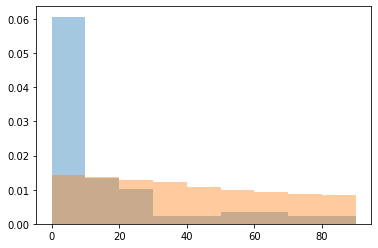

In [114]:
plt.hist(min_dists, density=True, alpha=.4, bins=list(range(0,100,10)))
plt.hist(min_dists_bootstrap, density=True, alpha=.4, bins=list(range(0,100,10)))

In [21]:
## Old

In [22]:
svs = pd.read_csv('/scratch/groups/dpwall/personal/briannac/SARS-CoV-2_Microdeletions/results/alignment/gisaid_hcov-19_2020_06_03_22.svs_table.tsv', 
                 sep='\t')
svs[(svs['# Sequences']>1) & (svs['Start Pos']>100) & ((svs['Start Pos'] + svs['Length (bp)'])<29800)].drop(['Available Samples', 'Possible Samples'],axis=1).to_csv('/scratch/groups/dpwall/personal/briannac/SARS-CoV-2_Microdeletions/figs/sv_table_small.csv', index=None)

FileNotFoundError: [Errno 2] File /scratch/groups/dpwall/personal/briannac/SARS-CoV-2_Microdeletions/results/alignment/gisaid_hcov-19_2020_06_03_22.svs_table.tsv does not exist: '/scratch/groups/dpwall/personal/briannac/SARS-CoV-2_Microdeletions/results/alignment/gisaid_hcov-19_2020_06_03_22.svs_table.tsv'

In [ ]:
svs = pd.read_csv('/scratch/groups/dpwall/personal/briannac/SARS-CoV-2_Microdeletions/results/alignment/gisaid_hcov-19_2020_06_03_22.svs_table.tsv', 
                 sep='\t')
svs[(svs['Start Pos']>100) & (svs['Start Pos']>100) & ((svs['Start Pos'] + svs['Length (bp)'])<29800)].drop(['Available Samples', 'Possible Samples'],axis=1).to_csv('/scratch/groups/dpwall/personal/briannac/SARS-CoV-2_Microdeletions/figs/sv_table_full.csv', index=None)